In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font',**{'family':'serif','monospace':['Palatino']})
mpl.rc('text', usetex=True)
plt.rcParams['figure.constrained_layout.use'] = False
mpl.rcParams.update({'font.size': 9})

## Read in the data

Particle tracking data is stored at `Justice_League_Code/Data/tracked_particles.hdf5`. This HDF5 file format stores multiple tables efficiently and can be easily written to/read into `pandas`. Each galaxy that has been tracked is stored as a table in the HDF5 file under the key `{sim}_{z0haloid}`. For example:

In [132]:
path = '../../Data/tracked_particles.hdf5'
with pd.HDFStore(path) as hdf:
    print(hdf.keys())

['/h148_13', '/h148_28', '/h148_37', '/h148_68', '/h229_20', '/h229_22', '/h242_24', '/h242_80', '/h329_11']


We'll use `h242_24` for now. 

In [133]:
key = 'h242_24'
data = pd.read_hdf(path, key=key)
data

,time,pid,rho,temp,mass,coolontime,r,r_per_Rvir,x,y,...,vy,vz,v,h1dist,sat_disk,sat_halo,IGM,host_halo,host_disk,classification
0,5.181190,811077,0.000037,5.369499e+05,26510.536704,0.000000,317.229043,5.719189,-173.390813,23.552462,...,60.804427,50.476683,95.964382,0.480790,False,False,False,True,False,4.0
1,5.181190,6872943,0.000560,1.621470e+06,33820.435130,4.999814,305.111904,5.500734,-149.748558,152.158116,...,66.244477,57.823935,99.444703,0.136986,False,False,False,True,False,4.0
2,5.181190,8840402,0.000179,6.317682e+04,26510.536704,0.000000,352.882340,6.361967,133.276947,199.077824,...,52.552052,56.460211,102.927645,1.046926,False,False,True,False,False,5.0
3,5.181190,8987571,0.000017,2.664518e+05,26510.536704,0.000000,26.778647,0.482781,-9.585453,-3.929157,...,-1.149735,12.167693,12.508564,0.881535,False,True,False,False,False,2.0
4,5.181190,9655109,0.000078,1.011527e+05,26510.536704,0.000000,16.040076,0.289180,-2.434631,-11.577726,...,7.376422,12.832934,18.211719,0.940907,False,True,False,False,False,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10476,13.800797,10503018,0.000018,2.953280e+05,26510.548793,0.000000,361.417481,7.212325,-312.938541,80.286533,...,119.089649,108.605117,161.833727,0.591847,False,False,False,True,False,4.0
10477,13.800797,10503024,0.000081,8.588152e+05,26520.522274,0.000000,240.255195,4.794451,-48.069470,61.066270,...,177.627681,26.501958,179.596503,0.289778,False,False,False,True,False,4.0
10478,13.800797,10503746,0.000117,1.134624e+06,26659.904046,5.228853,271.157246,5.411122,-121.951103,67.224175,...,141.383322,90.963555,197.051089,0.201811,False,False,False,True,False,4.0
10479,13.800797,10505840,0.000022,4.070112e+05,27619.316654,7.211029,267.735199,5.342833,14.907680,90.504259,...,177.970558,64.698599,189.578148,0.508686,False,False,False,True,False,4.0


In [188]:
pids = np.unique(data.pid)

np.random.seed(123)
pids_sub = np.random.choice(pids, size=50)

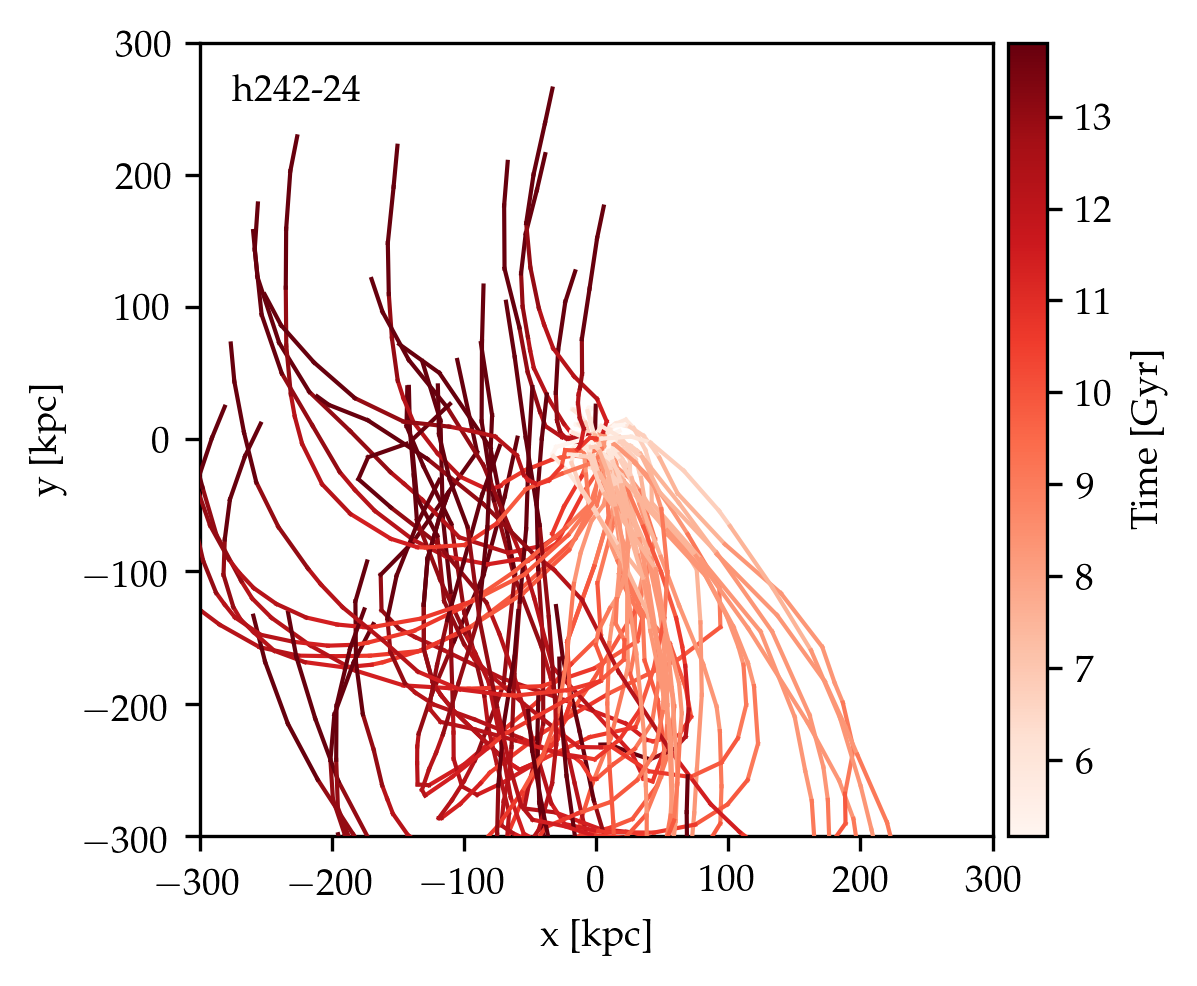

In [189]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
R = 300

fig, ax = plt.subplots(1,1,figsize=(4.2,3.5),dpi=300)
for j,pid in enumerate(pids_sub):
    d = data[data.pid==pid]
    
    cmap = mpl.cm.get_cmap('Reds', 12)
    tmin, tmax = np.min(d.time), np.max(d.time)
    
    i_prev = 0
    for i in range(len(d)-1):
        i += 1
        x1 = list(d.x)[i_prev]
        y1 = list(d.y)[i_prev]
        x2 = list(d.x)[i]
        y2 = list(d.y)[i]
        
        t = list(d.time)[i]
        ax.plot([x1,x2],[y1,y2],color=cmap((t-tmin)/(tmax-tmin)), linewidth=1, zorder=j)
        
        i_prev = i
    
    #ax.plot(d.x,d.y, color='k', linewidth=0.5, alpha=0.5, zorder=1)
    #im = ax.scatter(d.x, d.y, c=d.time, cmap='Reds', s=2, zorder=2)
    
    
divider = make_axes_locatable(ax)
ax_cb = divider.new_horizontal(size="5%", pad=0.05)    
cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=mpl.cm.Reds, orientation='vertical', 
                                norm = mpl.colors.Normalize(vmin=tmin, vmax=tmax),
                                label='Time [Gyr]')
fig.add_axes(ax_cb)

    
ax.set_xlim(-R,R)
ax.set_ylim(-R,R)
ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')
ax.annotate(key.replace("_","-"), (0.04,0.96), xycoords='axes fraction', va='top')
ax.set_aspect('equal')


plt.show()

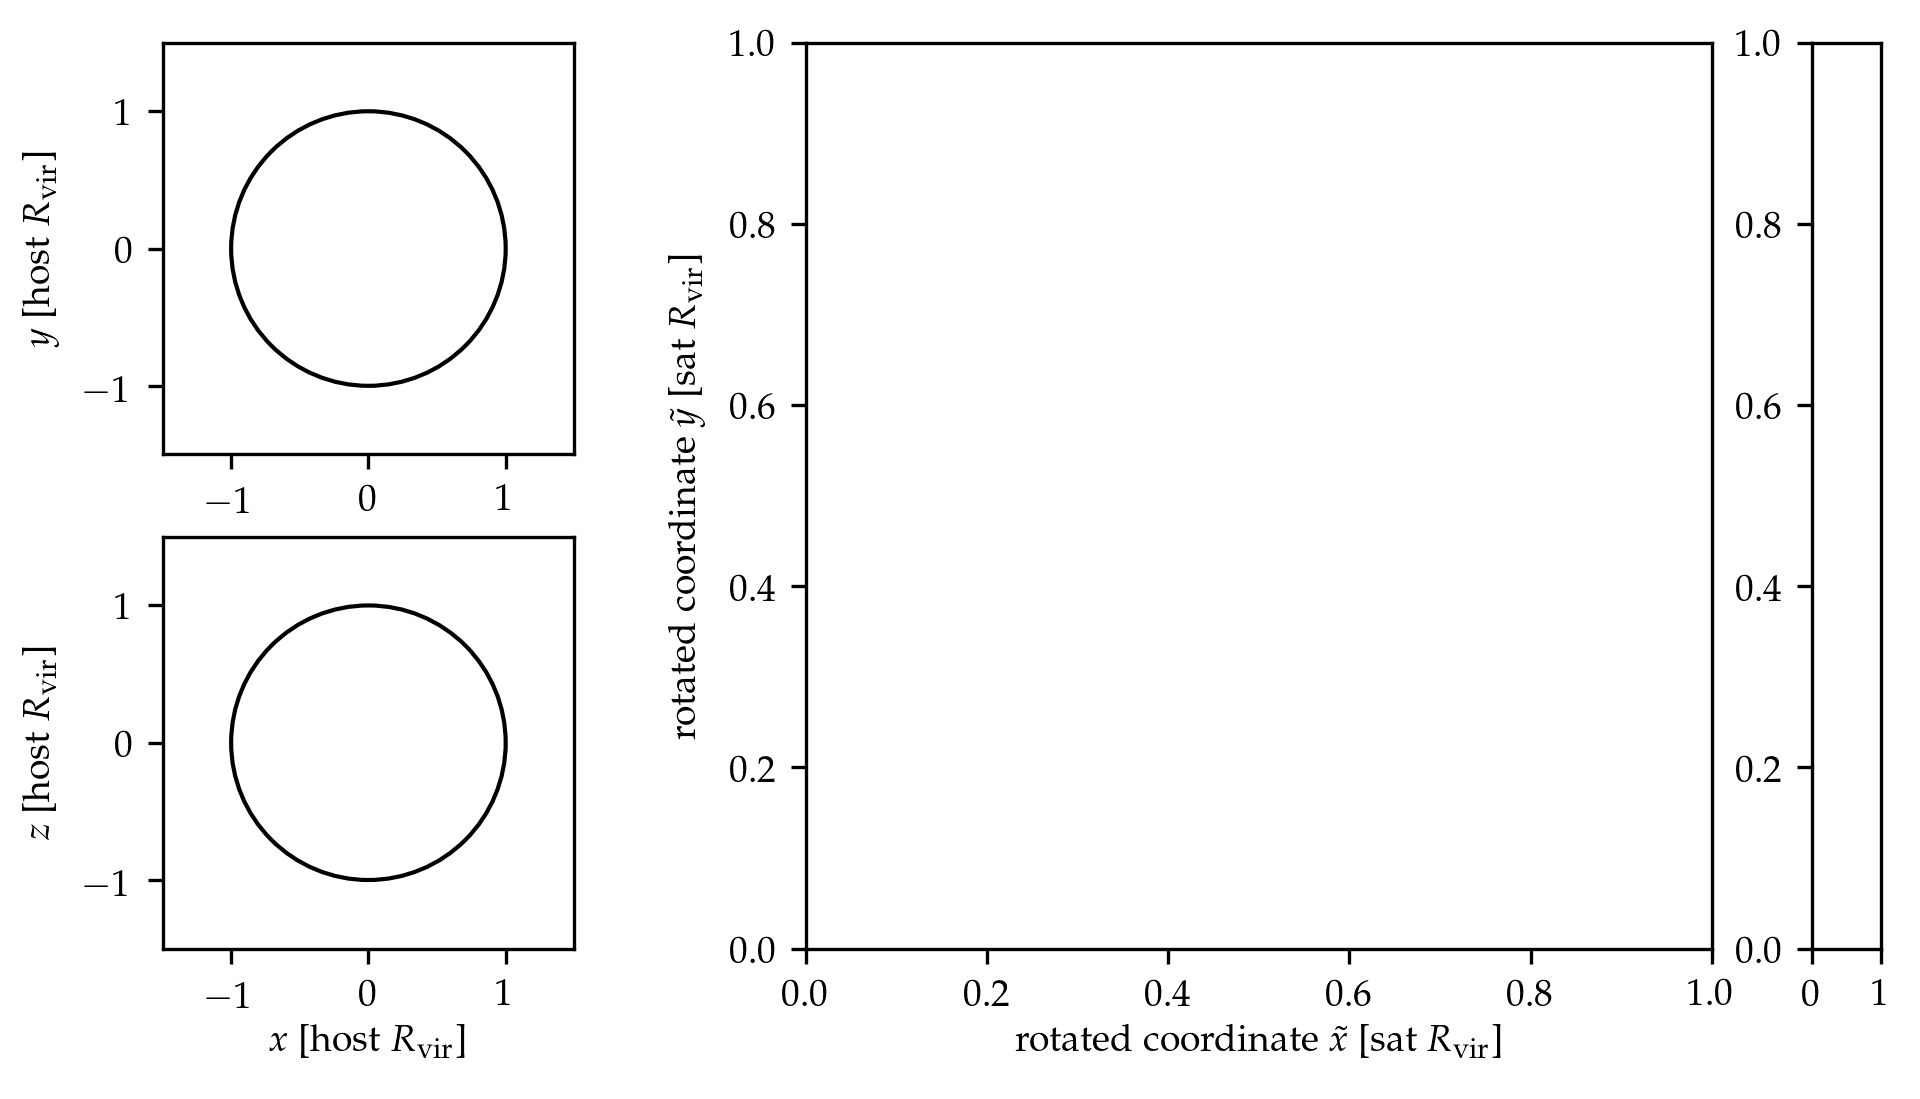

In [219]:
R = 1.5
# fig, ax = plt.subplots(1,3,figsize=(10,3),dpi=300)
fig = plt.figure(dpi=300, figsize=(7.5,4))
gs = mpl.gridspec.GridSpec(2,5, width_ratios = [1,0.1,1,1,0.15], figure=fig)
ax0 = plt.subplot(gs[0,0])
ax1 = plt.subplot(gs[1,0])
ax2 = plt.subplot(gs[0:,2:-1])
cbax = plt.subplot(gs[:,-1])

host_radius = plt.Circle((0, 0), 1, color='k', fill=False)
ax0.add_artist(host_radius)

host_radius = plt.Circle((0, 0), 1, color='k', fill=False)
ax1.add_artist(host_radius)

ax1.set_xlabel(r'$x$ [host $R_{\rm vir}$]')
ax1.set_ylabel(r'$z$ [host $R_{\rm vir}$]')
ax0.set_ylabel(r'$y$ [host $R_{\rm vir}$]')

ax0.set_xlim(-R,R)
ax0.set_ylim(-R,R)
ax1.set_xlim(-R,R)
ax1.set_ylim(-R,R)


ax0.set_aspect('equal')
ax1.set_aspect('equal')
ax2.set_aspect('equal')

ax2.set_xlabel(r'rotated coordinate $\tilde{x}$ [sat $R_{\rm vir}$]')
ax2.set_ylabel(r'rotated coordinate $\tilde{y}$ [sat $R_{\rm vir}$]')

plt.show()

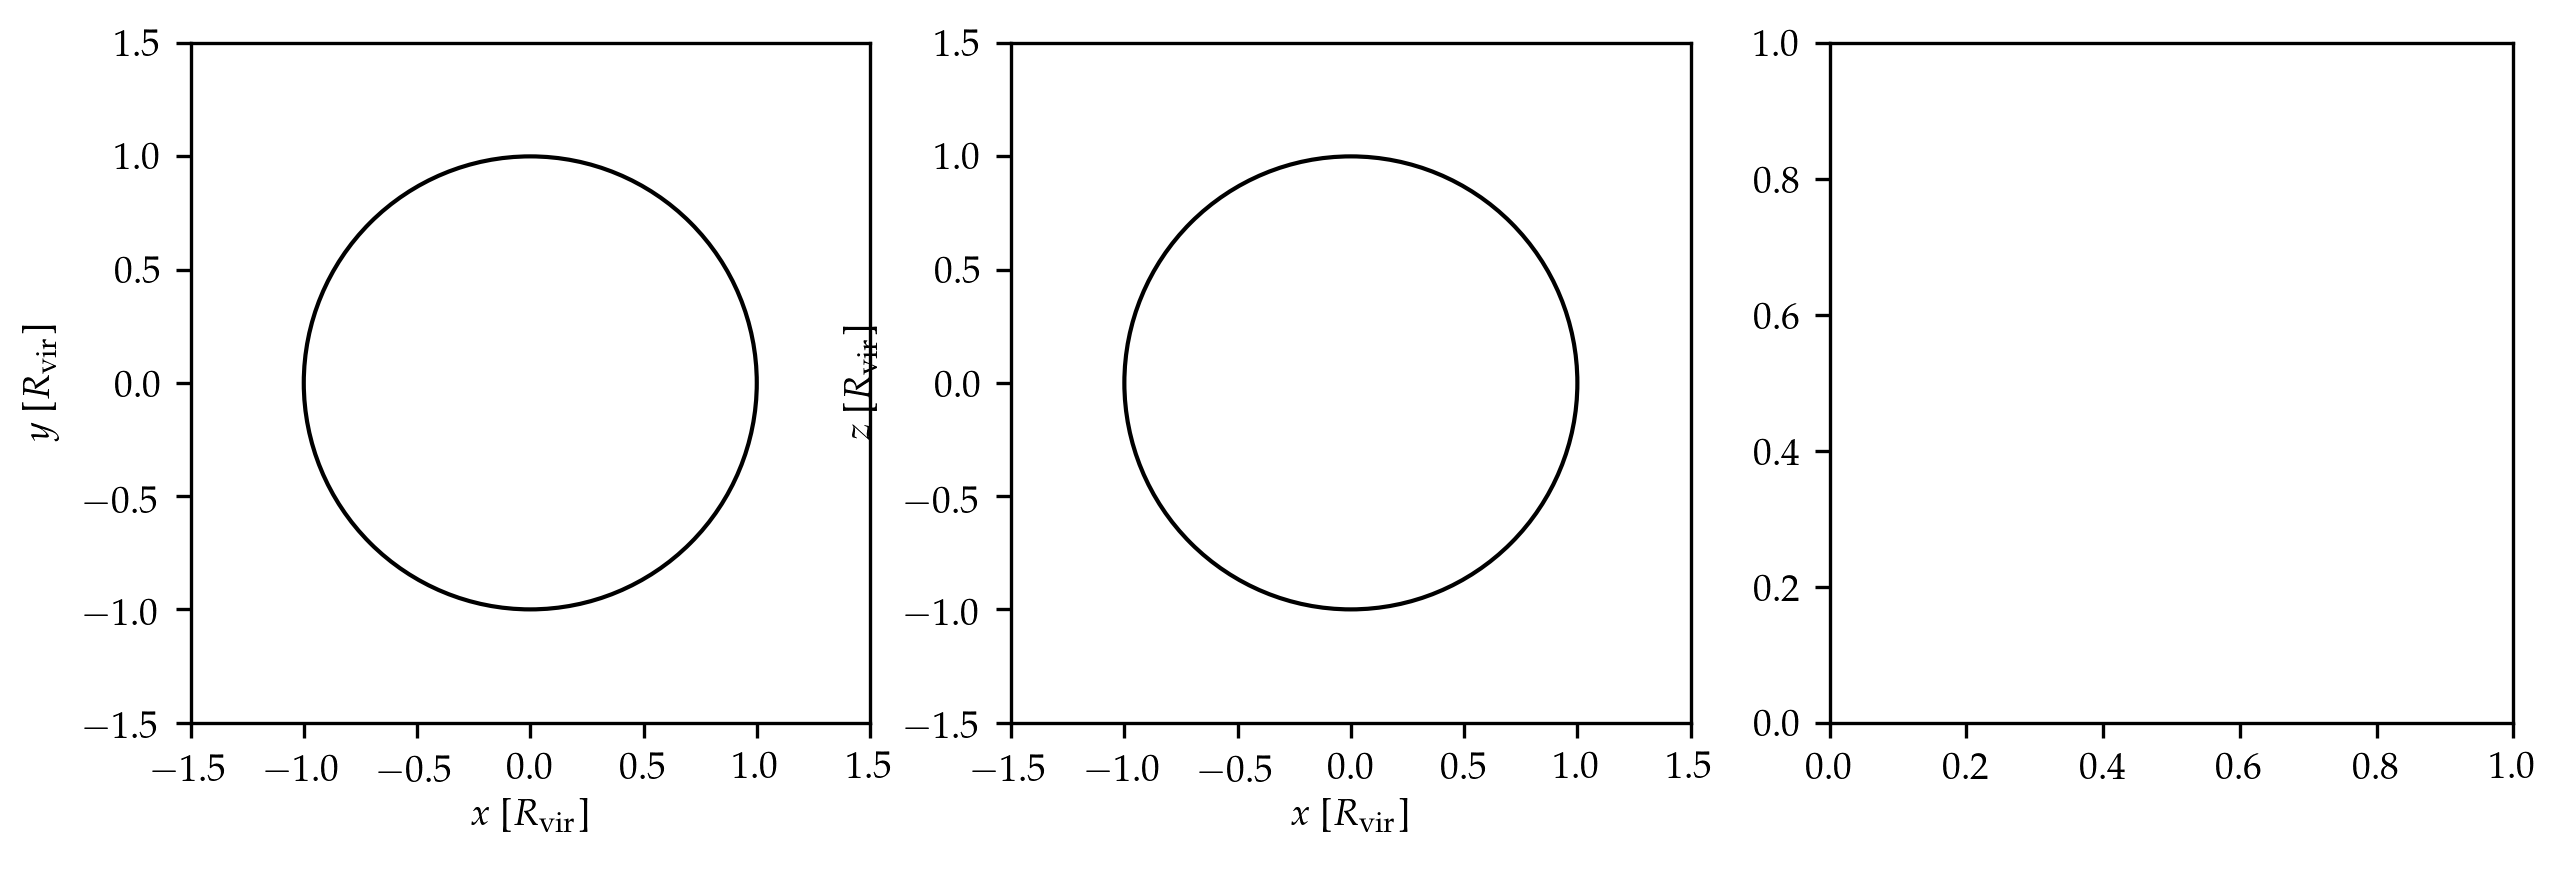

In [200]:
host_radius = plt.Circle((0, 0), 1, color='k', fill=False)
ax[0].add_artist(host_radius)

host_radius = plt.Circle((0, 0), 1, color='k', fill=False)
ax[1].add_artist(host_radius)


ax[0].set_xlabel(r'$x$ [$R_{\rm vir}$]')
ax[0].set_ylabel(r'$y$ [$R_{\rm vir}$]')

ax[1].set_xlabel(r'$x$ [$R_{\rm vir}$]')
ax[1].set_ylabel(r'$z$ [$R_{\rm vir}$]')

for a in [ax[0],ax[1]]:
    a.set_aspect('equal')
    a.set_xlim(-R,R)
    a.set_ylim(-R,R)

plt.show()

## compute mass-loss rates etc

/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


[  5.19155947   2.83738499 109.71459181   6.60140954   0.31170355
   2.39533584   2.49464891  13.47611855   2.43484526   3.77513227
   2.790965     7.83116762  12.41395073   5.55392185   4.8199653
   5.20185115   4.68606463   5.70607125   5.26424933   4.1331415
  13.25815256   5.59770942  56.33278928   0.                  inf
          nan          nan          nan          nan          nan
          nan          nan]


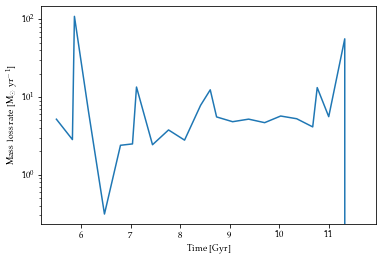

In [131]:
times = np.unique(data.time)

# start with: sat_halo to host_halo

# start with first snap tracked
d_prev = data[data.time==times[0]]
d_prev.sat_disk = (d_prev.rho >= 0.1) & (d_prev.temp <= 1.2e4) & (d_prev.r <= 3)
d_prev.sat_halo = (d_prev.r_per_Rvir < 1) & ~d_prev.sat_disk
t_prev = times[0]

mass_loss_rate = np.array([])
for t in times[1:]:
    d = data[data.time==t]

    d.sat_disk = (d.rho >= 0.1) & (d.temp <= 1.2e4) & (d.r <= 3)
    d.sat_halo = (d.r_per_Rvir < 1) & ~d.sat_disk
    
    # sorta hacky.... trying to make sure that we are accounting for loss of particles...
    d_prev = d_prev[np.isin(d_prev.pid, d.pid)]

    
    mass_lost = np.sum(d.mass[d_prev.sat_disk & d.sat_halo])/np.sum(d.mass[d_prev.sat_halo & d.sat_disk])
    mass_loss_rate = np.append(mass_loss_rate, mass_lost/(t-t_prev))
    

    #print(len(d.classification[np.array(d.classification)==np.array(d_prev.classification)])/len(d.classification))
    
    d_prev = d
    t_prev = t
    
print(mass_loss_rate)
plt.figure()
plt.plot(times[1:], mass_loss_rate)
plt.xlabel('Time [Gyr]')
plt.ylabel(r'Mass loss rate [M$_\odot$ yr$^{-1}$]')
plt.yscale('log')
plt.show()


In [78]:
mass_loss_rate

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## identifying gas particles that have just left the satellite halo

In [166]:
times = np.unique(data.time)

d_prev = data[data.time==times[0]]
# fix for now
d_prev.sat_disk = (d_prev.rho >= 0.1) & (d_prev.temp <= 1.2e4) & (d_prev.r <= 3)
d_prev.sat_halo = (d_prev.r_per_Rvir < 1) & ~d_prev.sat_disk

just_left = pd.DataFrame()
for t in times[1:]:
    d = data[data.time==t]

    # fix for now
    d.sat_disk = (d.rho >= 0.1) & (d.temp <= 1.2e4) & (d.r <= 3)
    d.sat_halo = (d.r_per_Rvir < 1) & ~d.sat_disk
    
    # sorta hacky.... trying to make sure that we are accounting for loss of particles...
    d_prev = d_prev[np.isin(d_prev.pid, d.pid)]
    
    just_left_bool = d_prev.sat_halo & d.host_halo
    d_to_concat = d[just_left_bool]
    d_to_concat['time_prev'] = d_prev.time
    just_left = pd.concat([just_left, d_to_concat])
        
    d_prev = d

/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


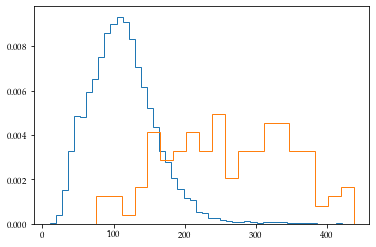

In [168]:
plt.figure()
plt.hist(just_left.v, bins=50, histtype='step', density=True)
plt.hist(just_left.v[just_left.coolontime > just_left.time_prev], bins=20, histtype='step', density=True)
plt.show()